In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp

<h3> Task 1 </h3>

In [2]:
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],
              [0, 0.986, 0.005, 0.004, 0.005],
              [0, 0, 0.992, 0.003, 0.005],
              [0, 0, 0, 0.991, 0.009],
              [0, 0, 0, 0, 1]])

In [3]:
def simulate_lifetimes(n = 1000):
  lifetimes = np.zeros(n)
  local = 0
  for i in range(n):
    state = 0
    local_flag = False
    while state != 4:
      probs = P[state, :]
      new_state = np.random.choice(a = 5, size = 1, p = probs)[0]
      if not local_flag and (new_state == 1 or new_state == 3) :
        local += 1
        local_flag = True
      if new_state != 4:
        lifetimes[i] += 1
      state = new_state
  return lifetimes.copy(), local

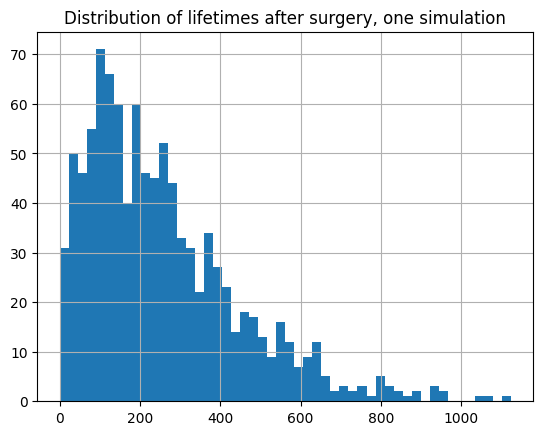

In [4]:
n = 1000
lifetimes, local = simulate_lifetimes(1000)
plt.hist(lifetimes, bins = 50)
plt.title('Distribution of lifetimes after surgery, one simulation')
plt.grid()
plt.show()

In [5]:
print('Fraction of women for which the cancer reappered locally:', local / n)

Fraction of women for which the cancer reappered locally: 0.675


<h3> Task 2 </h3>

In [6]:
p0 = np.array([1,0,0,0,0])
t = 120
true_distr = p0 @ np.linalg.matrix_power(P,t)
true_distr

array([0.35902627, 0.15895604, 0.1660869 , 0.06774149, 0.2481893 ])

In [7]:
def simulate_at_t(num = 1000, t = 120):
  state = 0
  states_at_t = np.zeros(num)
  for i in range(num):
    state = 0
    for step in range(t):
      probs = P[state, :]
      new_state = np.random.choice(a = 5, size = 1, p = probs)[0]
      state = new_state
    states_at_t[i] = state
  counts = np.zeros(5)
  for i in range(5):
    counts[i] = np.sum(states_at_t == i)
  return counts
  

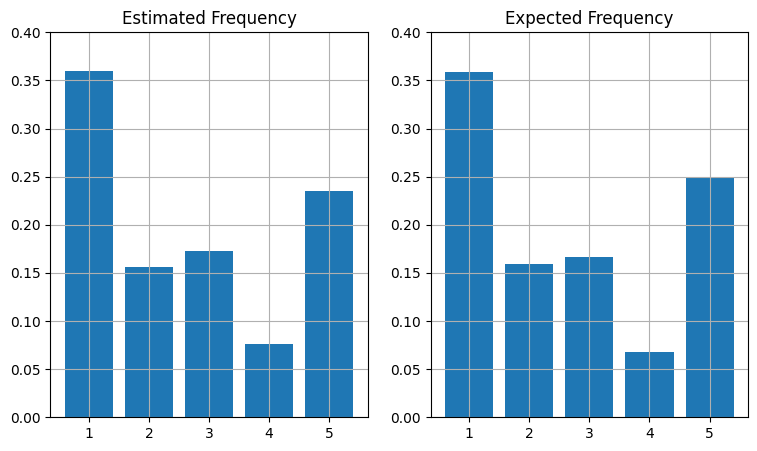

In [8]:
fig, axs = plt.subplots(1,2, figsize = (9,5))
axs[0].bar(np.arange(1,6), simulate_at_t(t = 120)/n)
axs[0].set_title('Estimated Frequency')
axs[0].set_ylim([0, 0.4])
axs[0].grid()
axs[1].bar(np.arange(1,6), true_distr)
axs[1].set_title('Expected Frequency')
axs[1].set_ylim([0, 0.4])
axs[1].grid()
plt.show()

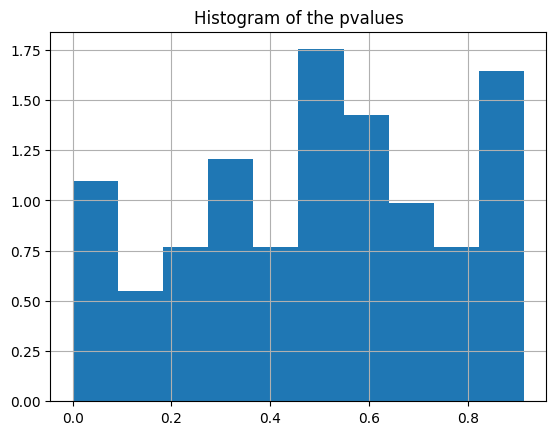

In [9]:
pvals = []
n = 1000
for i in range(100):
  pvals.append(stats.chisquare(simulate_at_t(), true_distr*n)[1])
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of the pvalues')
plt.show()

<h3> Task 3 </h3>

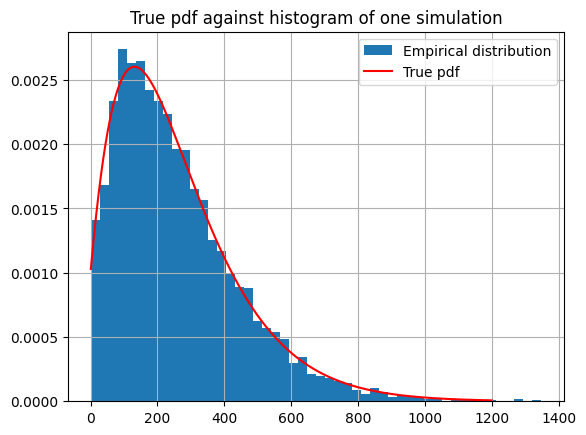

The expected lifetime starting from state 0 is: 262.3716 months
The empirical lifetime starting from state 0 is: 259.0450 months


In [10]:
def phase_type_distr(t, init):
  Ps = P[:4,:4]
  p = P[:4,4]
  return init @ (np.linalg.matrix_power(Ps, t) @ p)

def get_expected_value(init):
  Ps = P[:4,:4]
  return init @ np.linalg.inv(np.eye(4) - Ps) @ np.ones(4)

p0 = np.array([1,0,0,0])


lifetimes, _ = simulate_lifetimes(n = 5000)
plt.hist(lifetimes, bins = 50, density = True, label = 'Empirical distribution')
x = np.arange(1,1200)
y = [phase_type_distr(i, p0) for i in x]
plt.plot(x, y, color = 'r', label = 'True pdf')
plt.grid()
plt.legend()
plt.title('True pdf against histogram of one simulation')
plt.show()

print('The expected lifetime starting from state 0 is: {:.4f} months'.format(get_expected_value(p0)))
print('The empirical lifetime starting from state 0 is: {:.4f} months'.format(np.mean(lifetimes)))

<h3> Task 4 </h3>

In [11]:
n = 1000
found = 0
lifetimes = []
while found < n:
  state = 0
  lifetime = 0
  flag_cancer = False
  
  while state != 4:
    if lifetime > 12 and flag_cancer == False:
      break
    probs = P[state, :]
    new_state = np.random.choice(a = 5, size = 1, p = probs)[0]
    if not flag_cancer and (new_state == 1 or new_state == 2 or new_state == 3) and lifetime <= 12:
      flag_cancer = True
    state = new_state
    lifetime += 1

  if (flag_cancer and lifetime > 12):
    found +=1
    if(found % 100 == 0):
      print(f'I found {found} women')
    lifetimes.append(lifetime)

I found 100 women
I found 200 women
I found 300 women
I found 400 women
I found 500 women
I found 600 women
I found 700 women
I found 800 women
I found 900 women
I found 1000 women


In [12]:
print('Expected lifetime for task 4 is {:.4f} months'.format(np.mean(lifetimes)))

Expected lifetime for task 4 is 174.5410 months


<h3> Task 5 </h3>

In [13]:
nsim = 100
women = 200
X = np.empty(nsim)
Y = np.empty(nsim) # control variate
for iter in range(nsim):
    if (iter % 10 == 0):
        print(iter)
    lifetimes, _ = simulate_lifetimes(n = women)
    X[iter] = np.sum(lifetimes <= 350)/women
    Y[iter] = np.mean(lifetimes)

#crude montecarlo
print('Crude MC: estimated number of died women: {:.8f}'.format(np.mean(X)))
print('Crude MC: variance is: {:.8f}'.format(np.var(X, ddof = 1)))

#control variates
c = -np.cov(X,Y)[0,1]/np.var(Y, ddof = 1)
Z = X + c *(Y - get_expected_value([1,0,0,0]))
print('Control Variates: estimated number of died women: {:.8f}'.format(np.mean(Z)))
print('Control Variates: variance is: {:.8f}'.format(np.var(Z, ddof = 1)))


0
10
20
30
40
50
60
70
80
90
Crude MC: estimated number of died women: 0.73815000
Crude MC: variance is: 0.00097962
Control Variates: estimated number of died women: 0.73605537
Control Variates: variance is: 0.00030445


<h3> Task 7 </h3>

In [3]:
Q = np.array([[-0.0085, 0.005, 0.0025, 0, 0.001],
              [0, -0.014, 0.005, 0.004, 0.005],
              [0, 0, -0.008, 0.003, 0.005],
              [0, 0, 0, -0.009, 0.009],
              [0, 0, 0, 0, 0]])

In [15]:
def simulate_lifetimes_CTMC(n = 1000, Qsim = Q):
    lifetimes = np.zeros(n)
    distant = 0
    for i in range(n):
        state = 0
        lifetime  = 0
        distant_flag = 0
        while state != 4:
            rate = - Qsim[state, state]
            probs = Qsim[state, :]/rate
            probs[state] = 0
            lifetime += stats.expon.rvs(scale = 1/rate, size = 1)[0]
            new_state = np.random.choice(a = 5, size = 1, p = probs)[0]
            if not distant_flag and (new_state == 2 or new_state ==3) and lifetime >= 30.5:
                distant += 1
                distant_flag = True
            state = new_state
        lifetimes[i] = lifetime
    return lifetimes.copy(), distant

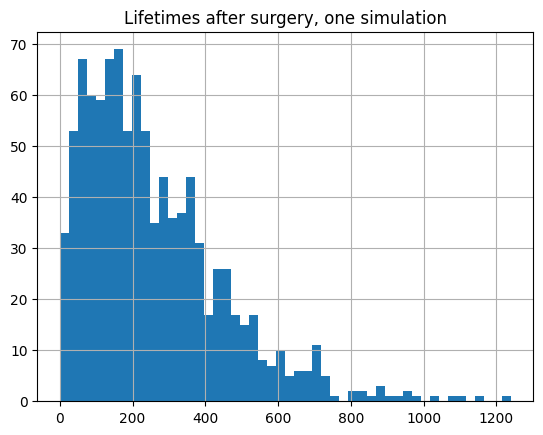

Cancer has reappeared distantly after 30.5 months:  0.606


In [16]:
women = 1000
lifetimes, distant = simulate_lifetimes_CTMC(n = women)
plt.hist(lifetimes, bins = 50)
plt.title('Lifetimes after surgery, one simulation')
plt.grid()
plt.show()
print('Cancer has reappeared distantly after 30.5 months: ', distant/women)

Confidence interval for the mean

In [17]:
CL = 0.95 # confidence level
n = lifetimes.shape[0]
DF = n - 1 # degrees of freedom
z = np.abs(stats.t.ppf((1-CL)/2,DF))
mean = np.mean(lifetimes)
std = np.std(lifetimes, ddof = 1)
u = mean + z*std/np.sqrt(n)
l = mean - z*std/np.sqrt(n)
print('The mean lifetime is: {:.4f}'.format(mean))
print('With the following confidence interval: {:.5f}, {:.5f}'.format(l, u))

The mean lifetime is: 257.8944
With the following confidence interval: 246.01532, 269.77355


Confidence interval for the standard deviation

In [18]:
CL = 0.95
n = lifetimes.shape[0]
DF = n - 1
xl = stats.chi2.ppf((1 + CL)/2, df = DF)
xu = stats.chi2.ppf((1 - CL)/2, df = DF)
s = np.std(lifetimes, ddof = 1)
u = np.sqrt((n - 1)*s**2/xu)
l = np.sqrt((n - 1)*s**2/xl)

print('The empirical standard deviation is: {:.4f}'.format(std))
print('With the following confidence interval: {:.5f}, {:.5f}'.format(l, u))

The empirical standard deviation is: 191.4297
With the following confidence interval: 183.39206, 200.20974


<h3> Task 8 </h3>

In [19]:
def ct_phase_type_distr(t, init):
    Qs = Q[:4,:4]
    expQst = sp.linalg.expm(Qs*t)
    return 1 - init @ expQst @ np.ones(4)

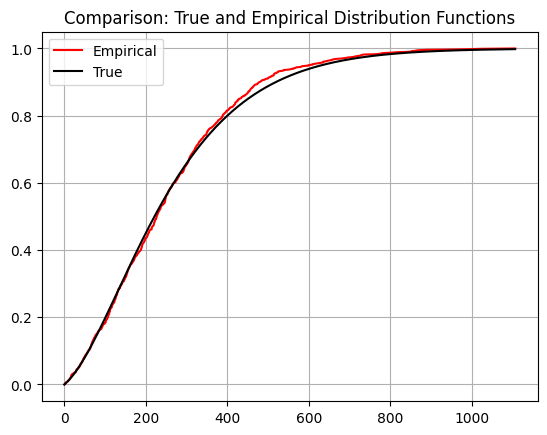

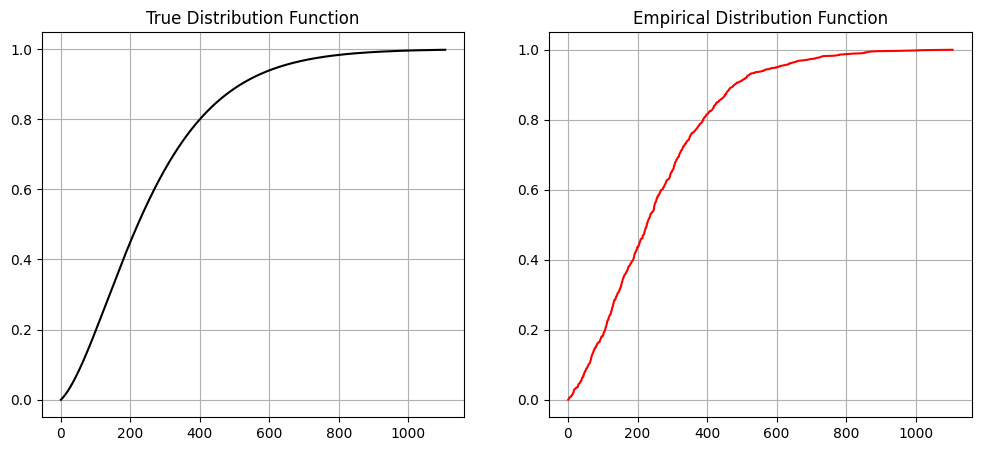

In [20]:
women = 1000
lifetimes, _ = simulate_lifetimes_CTMC(n = women)

empirical_F = np.cumsum(lifetimes)
plt.plot(np.sort(lifetimes), np.linspace(0, 1, n), color = 'red', label = 'Empirical')

p0 = np.array([1,0,0,0])
x = np.linspace(0,np.max(lifetimes),1000)
y = [ct_phase_type_distr(i, p0) for i in x]
plt.plot(x, y, color = 'black', label = 'True')
plt.grid()
plt.legend()
plt.title('Comparison: True and Empirical Distribution Functions')
plt.show()

fig, axs = plt.subplots(1,2, figsize = (12,5))
axs[0].plot(x, y, color = 'black', label = 'True')
axs[0].grid()
axs[0].set_title('True Distribution Function')
axs[1].plot(np.sort(lifetimes), np.linspace(0, 1, n), color = 'red', label = 'Empirical')
axs[1].grid()
axs[1].set_title('Empirical Distribution Function')
plt.show()

The correct test is kolmogorov smirnov I think

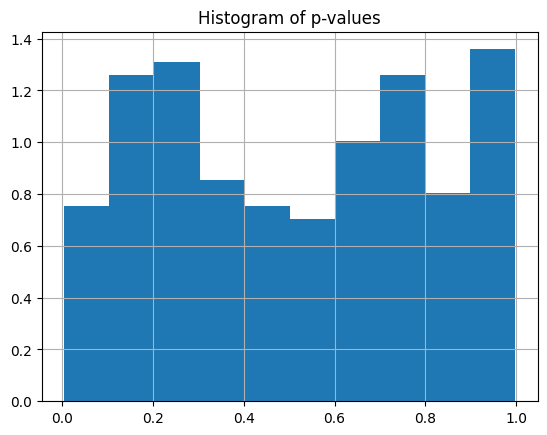

In [21]:
pvals = []
for _ in range(200):
    lifetimes, _ = simulate_lifetimes_CTMC(n = 1000)
    pvals.append(stats.kstest(lifetimes, cdf = (lambda x: np.array([1 - np.array([1,0,0,0]) @ sp.linalg.expm(Q[:4,:4]*i) @ np.ones(4) for i in x])))[1])

plt.figure()
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

<h3> Task 9 </h3>

In [2]:
Q_t = np.array([[-0.00475, 0.0025, 0.00125, 0, 0.001],
                [0, -0.007, 0, 0.002, 0.005],
                [0, 0, -0.008, 0.003, 0.005],
                [0, 0, 0, -0.009, 0.009],
                [0, 0, 0, 0, 0]])

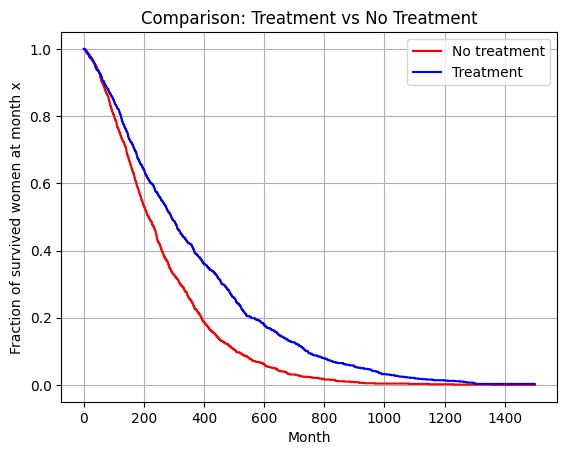

In [23]:
women = 1000
lifetimes_no_treatment, _ = simulate_lifetimes_CTMC(n = women, Qsim = Q)
lifetimes_treatment, _ = simulate_lifetimes_CTMC(n = women, Qsim = Q_t)

women = 1000
times = np.linspace(0, 1500, 10000)
y_no_treatment = [(women - np.sum(lifetimes_no_treatment < t))/women for t in times]
y_treatment = [(women - np.sum(lifetimes_treatment < t))/women for t in times]

plt.plot(times, y_no_treatment, color = 'red', label = 'No treatment')
plt.plot(times, y_treatment, color = 'blue', label = 'Treatment')
plt.grid()
plt.legend()
plt.title('Comparison: Treatment vs No Treatment')
plt.ylabel('Fraction of survived women at month x')
plt.xlabel('Month')
plt.show()

<h3> Task 12 </h3>

Generate trajectories using the true Q matrix: we record the state every 48 months.

In [4]:
def generate_trajectories(n = 10000, Qsim = Q, months = 48):
    trajectories = []
    for _ in range(n):
        state = 0
        trajectory = [0]
        lifetime = 0
        while state != 4:
            rate = - Qsim[state, state]
            lifetime += stats.expon.rvs(scale = 1/rate, size = 1)[0]
            if (lifetime >= len(trajectory)*months):
                for _ in range(int(lifetime // months - len(trajectory) + 1)):
                    trajectory.append(state)
            probs = Qsim[state, :]/rate
            probs[state] = 0
            state = np.random.choice(a = 5, size = 1, p = probs)[0]
        trajectory.append(4)
        trajectories.append(trajectory)
    return trajectories

In [5]:
trajectories = generate_trajectories()

<h3> Task 13 </h3>

In [9]:
def simulate_lifetime_at_t(initial_state = 0, months = 48, Qsim = Q):
    state = initial_state
    lifetime = 0
    states_list = []
    lifetime_list = []
    while (lifetime < months):
        rate = - Qsim[state, state]
        probs = Qsim[state, :]/rate
        probs[state] = 0
        delta_lifetime = np.min([stats.expon.rvs(scale = 1/rate, size = 1)[0], months - lifetime])
        lifetime += delta_lifetime
        lifetime_list.append(delta_lifetime)
        states_list.append(state)
        if lifetime < months:
            state = np.random.choice(a = 5, size = 1, p = probs)[0]
        if state == 4:
            states_list.append(4)
            lifetime_list.append(0)
            break
    return states_list, lifetime_list

In [10]:
#initialization
Qest = np.zeros((5, 5))
for i in range(5):
    Qest[i, i+1:] = np.random.rand(4 - i)*0.01
    Qest[i,i] = -np.sum(Qest[i, i+1:])

print('---------------------------------------------------------------')
eps = 1e-3
women = 2000

iter = 0
max_iter = 20
while(iter < max_iter):
    print(f'Iteration {iter+1} out of a max of {max_iter}')
    #step 1
    counts = np.zeros((5,5))
    s = np.zeros(5)
    for woman in range(women):
        trajectory = trajectories[woman]
        for i,y in enumerate(trajectory[:-1]):
            sim_trajectory, sim_lifetime_list = simulate_lifetime_at_t(initial_state = y, months = 48, Qsim = Qest)
            while (sim_trajectory[-1]!=trajectory[i+1]):
                sim_trajectory, sim_lifetime_list = simulate_lifetime_at_t(initial_state = y, months = 48, Qsim = Qest)
            #step 2
            for j in range(len(sim_trajectory) - 1):
                if(sim_trajectory[j] != sim_trajectory[j+1]):
                    counts[sim_trajectory[j], sim_trajectory[j+1]] += 1
            for idx, state in enumerate(sim_trajectory[:]):
                s[state] += sim_lifetime_list[idx]

    #step 3

    newQest = np.zeros((5,5))
    newQest[:4,:] = counts[:4,:]/s[:4,None]
    for i in range(4):
        newQest[i,i] = -np.sum(newQest[i, i+1:])

    # check break condition
    if np.linalg.norm(Qest - newQest, ord = np.inf) < eps:
        print('Convergence Achieved!')
        break
    # otherwise we make another iteration
    Qest = newQest
    iter += 1

print('---------------------------------------------------------------')
print('Estimated Matrix:\n', Qest)
print('\nTrue Matrix:\n', Q)
print('\n\nRelative error in the estimation: {:.4f} %'.format(np.linalg.norm(Q - Qest)/np.linalg.norm(Q)*100))

---------------------------------------------------------------
Iteration 1 out of a max of 20
Iteration 2 out of a max of 20
Iteration 3 out of a max of 20
Iteration 4 out of a max of 20
Iteration 5 out of a max of 20
Iteration 6 out of a max of 20
Convergence Achieved!
---------------------------------------------------------------
Estimated Matrix:
 [[-0.00842862  0.00466946  0.00262552  0.00019386  0.00093979]
 [ 0.         -0.01338947  0.00488208  0.00364948  0.00485791]
 [ 0.          0.         -0.00783263  0.002799    0.00503363]
 [ 0.          0.          0.         -0.00879756  0.00879756]
 [ 0.          0.          0.          0.          0.        ]]

True Matrix:
 [[-0.0085  0.005   0.0025  0.      0.001 ]
 [ 0.     -0.014   0.005   0.004   0.005 ]
 [ 0.      0.     -0.008   0.003   0.005 ]
 [ 0.      0.      0.     -0.009   0.009 ]
 [ 0.      0.      0.      0.      0.    ]]


Relative error in the estimation: 3.6889 %
